<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [11]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [37]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)
data

,Студенты/школьники,Иниц.стиль,Крит.стиль,Упр.стиль,Практ.стиль,Ф.внимания,К.атрибуция,Тол. к противор.,В.изменений,Общий пок. А/Х,...,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",пол,возраст,Оценки в этом году
0,0,21,21,21,18,14,6,16,36,72,...,5,5,5,5,5,5,5,1,12,2
1,0,18,21,18,17,24,29,16,27,96,...,5,5,5,5,5,5,5,1,12,3
2,0,19,25,16,24,25,25,24,24,98,...,5,5,5,5,5,5,5,1,13,2
3,0,19,22,18,17,24,24,24,26,98,...,5,1,5,1,4,2,2,1,13,2
4,0,21,21,21,19,20,24,20,23,87,...,3,3,4,3,3,2,2,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,18,20,23,21,27,33,26,22,108,...,3,3,1,2,2,5,5,0,25,5
579,1,20,20,18,16,30,25,30,25,110,...,3,3,3,3,3,3,3,0,25,4
580,1,24,23,23,25,26,34,24,24,108,...,4,4,3,3,3,5,4,0,25,4
581,1,20,28,24,24,25,33,28,31,117,...,3,2,2,3,1,5,5,1,25,3


In [ ]:
# describe the data

data.describe()

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,0.537786,1.253076,2.702988,4.826011,0.861160,87.820738,9.050967,1.949033,82.282460,...,2.388401,1.414763,1.71529,1.456942,3.045694,2.427065,0.284710,17.987698,3.681898,1.609842
std,164.400426,0.499009,2.091043,2.098291,2.899665,1.149121,14.685537,2.151613,2.151613,19.560051,...,1.229883,1.410546,1.43269,1.347399,1.060504,1.244158,0.451673,2.875012,0.840673,0.583495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,0.000000,18.180000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000
25%,143.000000,0.000000,0.000000,1.000000,3.000000,0.000000,80.000000,8.000000,0.000000,72.730000,...,1.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,16.000000,3.000000,1.000000
50%,285.000000,1.000000,0.000000,2.000000,5.000000,0.000000,90.000000,10.000000,1.000000,90.910000,...,3.000000,1.000000,2.00000,1.000000,3.000000,2.000000,0.000000,18.000000,4.000000,2.000000
75%,427.000000,1.000000,2.000000,4.000000,7.000000,1.000000,100.000000,11.000000,3.000000,100.000000,...,3.000000,2.000000,3.00000,2.000000,4.000000,3.000000,1.000000,20.000000,4.000000,2.000000
max,569.000000,1.000000,10.000000,10.000000,10.000000,7.000000,100.000000,11.000000,9.000000,100.000000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,1.000000,26.000000,5.000000,3.000000


In [4]:
# variable names

data.keys()

Index(['Студенты/школьники', 'Иниц.стиль', 'Крит.стиль', 'Упр.стиль',
       'Практ.стиль', 'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       'В.изменений', 'Общий пок. А/Х', 'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',
       'Обуч.', 'Р.уч.акт.', 'Проц.навыки', 'Металл.', 'Метка.контроль',
       'Сниж.рефл', 'Степ.осозн.', 'Контент', 'Техносфера', 'Коммуникация',
       'Потребление',
       '1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       '2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       '3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       '4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       '5. Использование моего смартфона отвлекает мой разум от проблем.',
       '6. Я трачу на использование смар

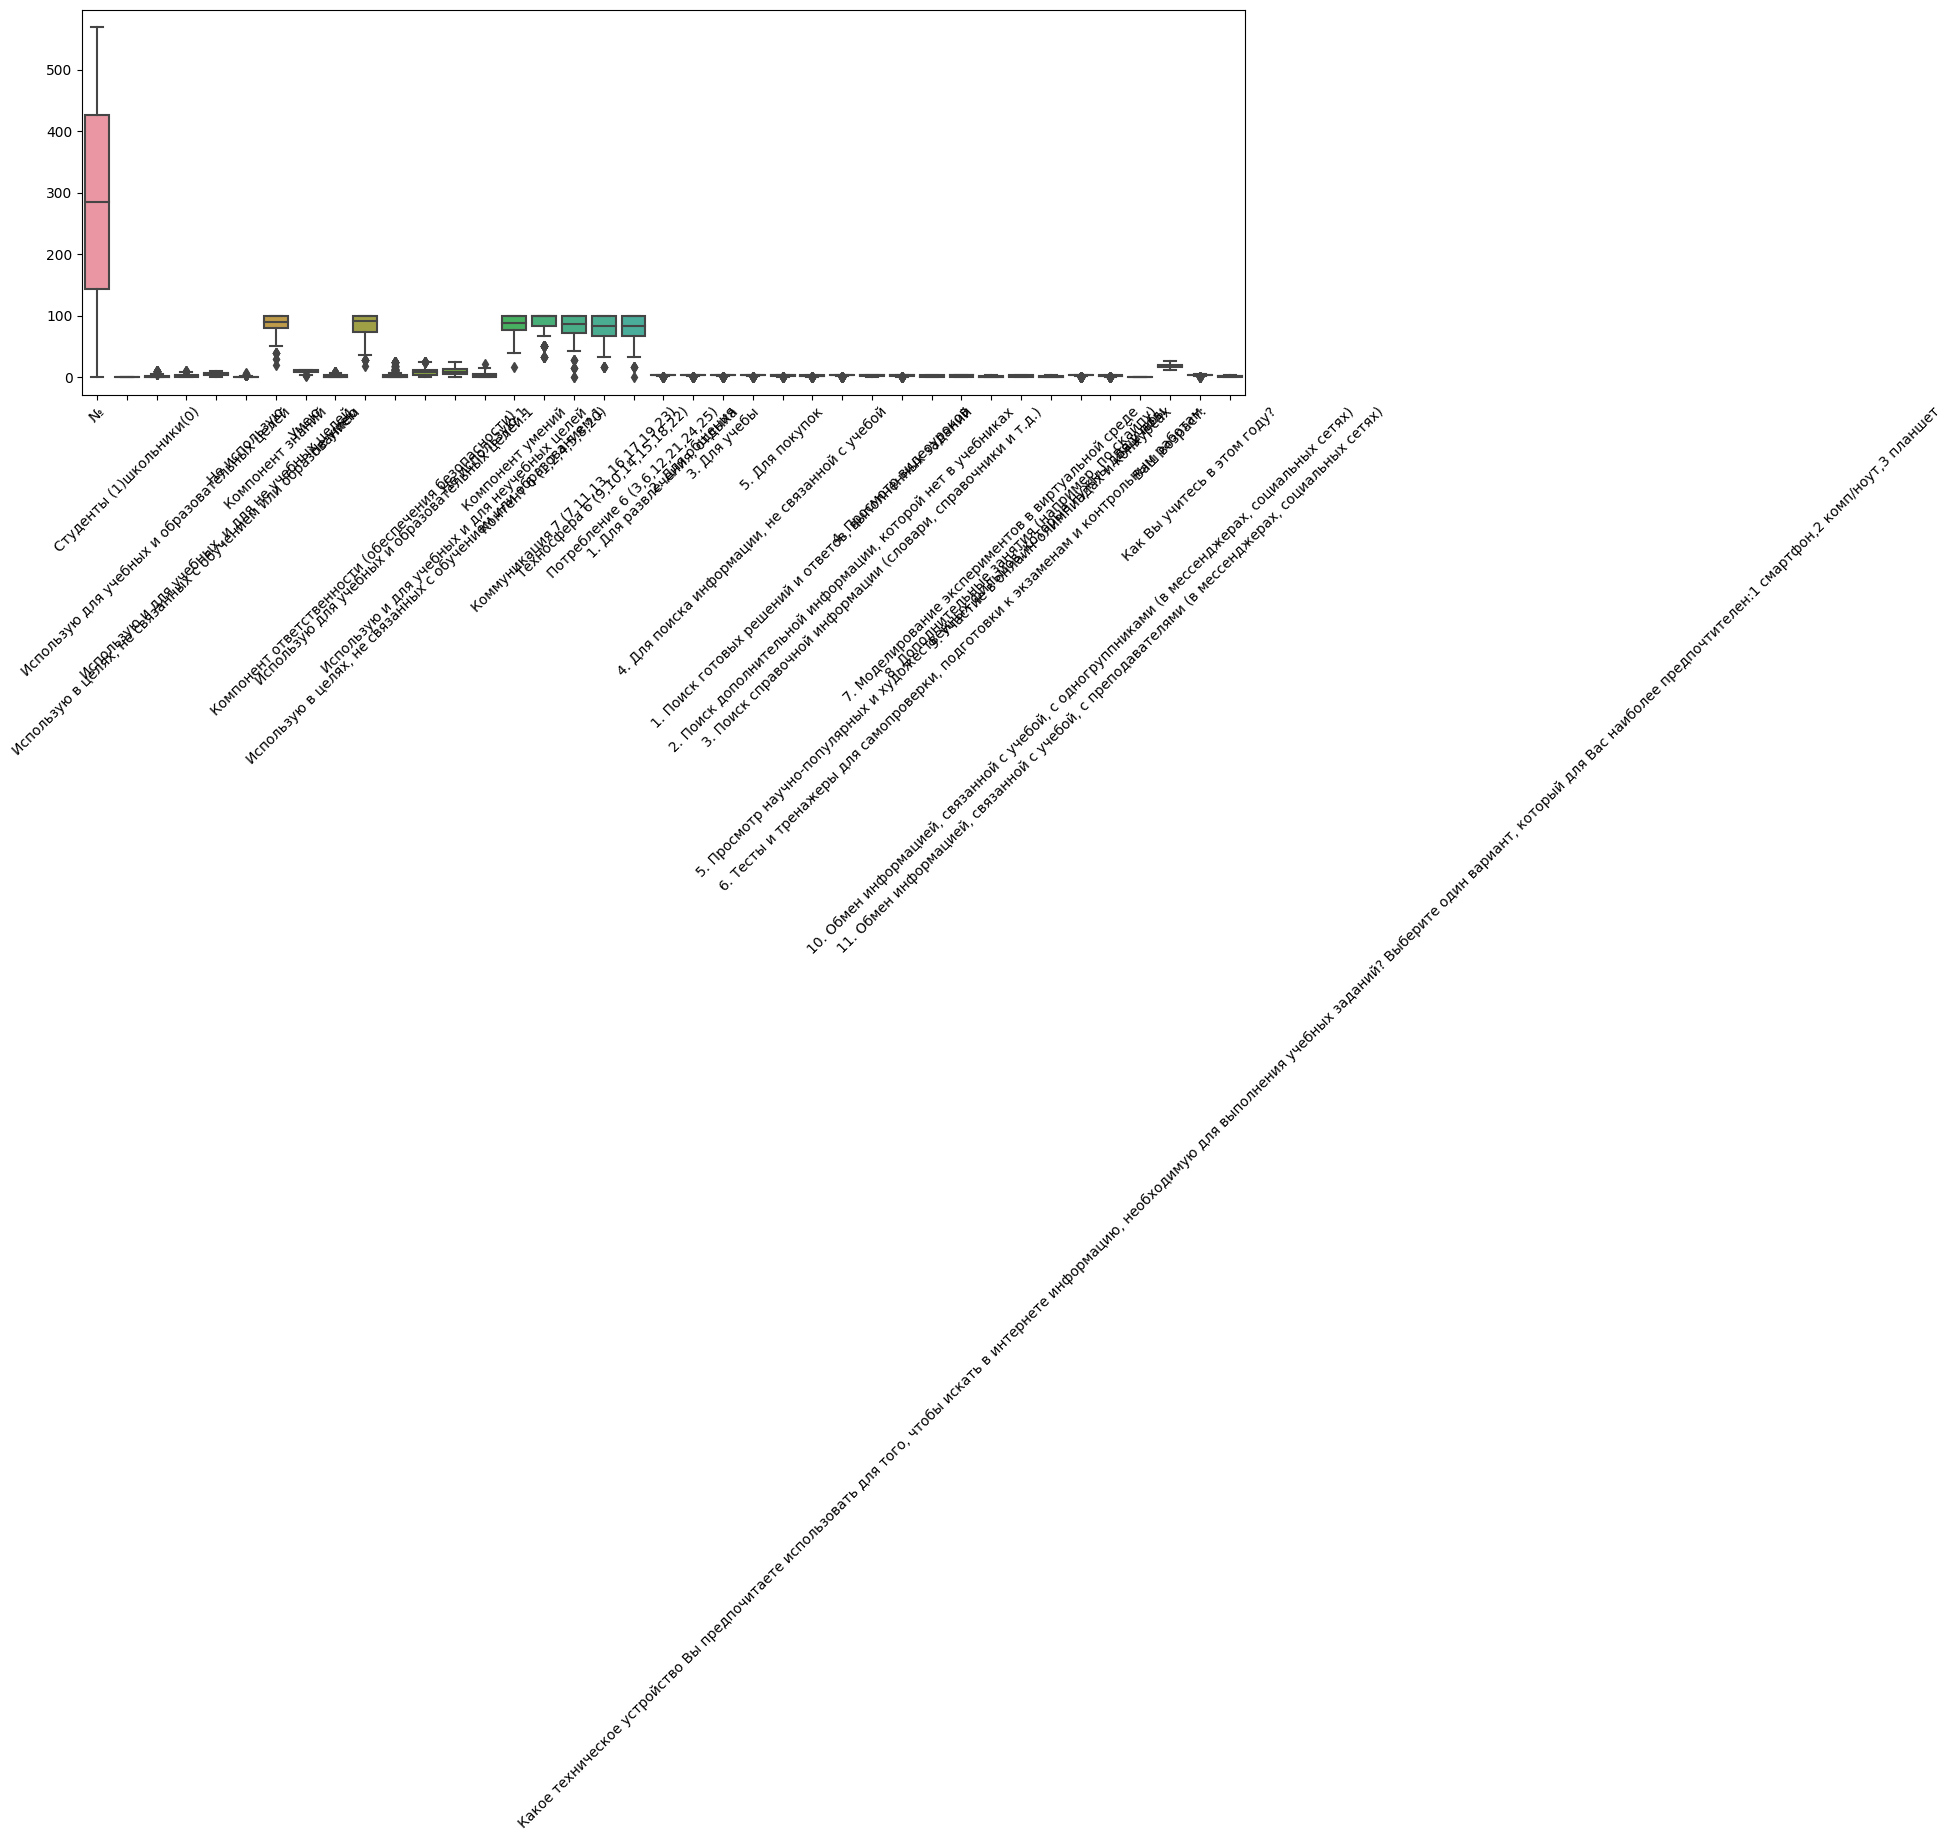

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

# Logistic regression

In [40]:
import statsmodels.api as sm

In [41]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data[ 'Студенты/школьники'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data[ 'Студенты/школьники'] > binthresh
data


,Студенты/школьники,Иниц.стиль,Крит.стиль,Упр.стиль,Практ.стиль,Ф.внимания,К.атрибуция,Тол. к противор.,В.изменений,Общий пок. А/Х,...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",пол,возраст,Оценки в этом году,binquality
0,0,21,21,21,18,14,6,16,36,72,...,5,5,5,5,5,5,1,12,2,False
1,0,18,21,18,17,24,29,16,27,96,...,5,5,5,5,5,5,1,12,3,False
2,0,19,25,16,24,25,25,24,24,98,...,5,5,5,5,5,5,1,13,2,False
3,0,19,22,18,17,24,24,24,26,98,...,1,5,1,4,2,2,1,13,2,False
4,0,21,21,21,19,20,24,20,23,87,...,3,4,3,3,2,2,0,13,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,18,20,23,21,27,33,26,22,108,...,3,1,2,2,5,5,0,25,5,True
579,1,20,20,18,16,30,25,30,25,110,...,3,3,3,3,3,3,0,25,4,True
580,1,24,23,23,25,26,34,24,24,108,...,4,3,3,3,5,4,0,25,4,True
581,1,20,28,24,24,25,33,28,31,117,...,2,2,3,1,5,5,1,25,3,True


In [45]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality



xcols = []


for key in data.keys():
  if key in [
      'Студенты/школьники',

       #'Иниц.стиль',
       'Крит.стиль', 'Упр.стиль',
       'Практ.стиль',

       #'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       #'В.изменений',
       #'Общий пок. А/Х',

       #'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       #'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',

       'Обуч.', 'Р.уч.акт.',

       #'Проц.навыки', 'Металл.', 'Метка.контроль',
       #'Сниж.рефл',
       #'Степ.осозн.',

       #'Уч.знания', 'Неуч.знания',
       #'Уч.и Неуч. Знания',
       #'Комп.знания',
       #'Ответств.',
       #'Комп. Умения',
       #'Контент',
       'Техносфера',
       'Коммуникация',
       'Потребление',

       #'1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       #'2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       #'3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       #'4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       #'5. Использование моего смартфона отвлекает мой разум от проблем.',
       #'6. Я трачу на использование смартфона непозволительно много времени.',
       #'7. Я часто продолжаю пользоваться своим смартфоном, несмотря на мысли о том, что было бы лучше прекратить.',
       #'8. Использование смартфона наносит урон моему здоровью и/или эмоциональному благополучию.',
       #'9. Если со мной нет моего смартфона, мысли об этом становятся навязчивыми.',
       #'10. Использование смартфона вредит моей учебе.',

       #'1. Для развлечения, отдыха',
       '2. Для общения',
       '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой',
       '5. Для покупок',

       #'1. Поиск готовых решений и ответов, выполненных заданий',
       #'2. Поиск дополнительной информации, которой нет в учебниках',
       #'3. Поиск справочной информации (словари, справочники и т.д.)',
       #'4. Просмотр видеоуроков',
       #'5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
       #'6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
       #'7. Моделирование экспериментов в виртуальной среде',
       #'8. Дополнительные занятия (например, по скайпу)',
       #'9. Участие в онлайн-олимпиадах и конкурсах',
       #'10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
       #'11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)',

       #'пол',
       #'возраст',
       'Оценки в этом году'
       ]:
                     xcols.append(key)

xcols

['Крит.стиль',
 'Упр.стиль',
 'Практ.стиль',
 'Обуч.',
 'Р.уч.акт.',
 'Техносфера',
 'Коммуникация',
 'Потребление',
 '2. Для общения',
 '3. Для учебы',
 '4. Для поиска информации, не связанной с учебой',
 '5. Для покупок']

In [50]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.524574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                  583
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                           11
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.2420
Time:                        12:38:35   Log-Likelihood:                -305.83
converged:                       True   LL-Null:                       -403.48
Covariance Type:            nonrobust   LLR p-value:                 6.997e-36
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Крит.стиль                                         -0.0635      0.036     -1.754      0.080      -0.135       0.007
Упр.стиль                                           0.1003      0.033      3.082      0.002       0.037       0.164
Практ.стиль                                        -0.1412      0.034     -4.134      0.000      -0.208      -0.074
Обуч.                                              -0.0827      0.015     -5.668      0.000      -0.111      -0.054
Р.уч.акт.                                           0.0715      0.013      5.568      0.000       0.046       0.097
Техносфера                                         -0.0298      0.007     -4.425      0.000      -0.043      -0.017
Коммуникация                                        0.0255      0.007      3.493      0.000       0.011       0.040
Потребление                                         0.0145      0.007      2.009      0.045       0.000       0.029
2. Для общения                                     -0.3060      0.137     -2.230      0.026      -0.575      -0.037
3. Для учебы                                        0.8588      0.144      5.982      0.000       0.577       1.140
4. Для поиска информации, не связанной с учебой    -0.0142      0.135     -0.105      0.916      -0.279       0.251
5. Для покупок                                     -0.2310      0.110     -2.106      0.035      -0.446      -0.016
===================================================================================================================
"""

In [19]:
from IPython.display import display, HTML

In [20]:
# Get the coefficients
coefficients = results.params

# Calculate the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the odds ratios with corresponding variable names
odds_ratios_df = pd.DataFrame({'Variable': coefficients.index, 'Odds Ratio': odds_ratios.values})

# Display the odds ratios
#print(odds_ratios_df)
display(HTML(odds_ratios_df.to_html()))


,Variable,Odds Ratio
0,Крит.стиль,0.869620
1,Упр.стиль,0.998693
2,Практ.стиль,0.873523
3,Обуч.,0.873422
4,Р.уч.акт.,0.942299
5,Техносфера,0.982197
6,Коммуникация,1.021501
7,Потребление,1.002313
8,2. Для общения,0.768457
9,3. Для учебы,1.761264


In [21]:
! pip install matplotlib seaborn pandas


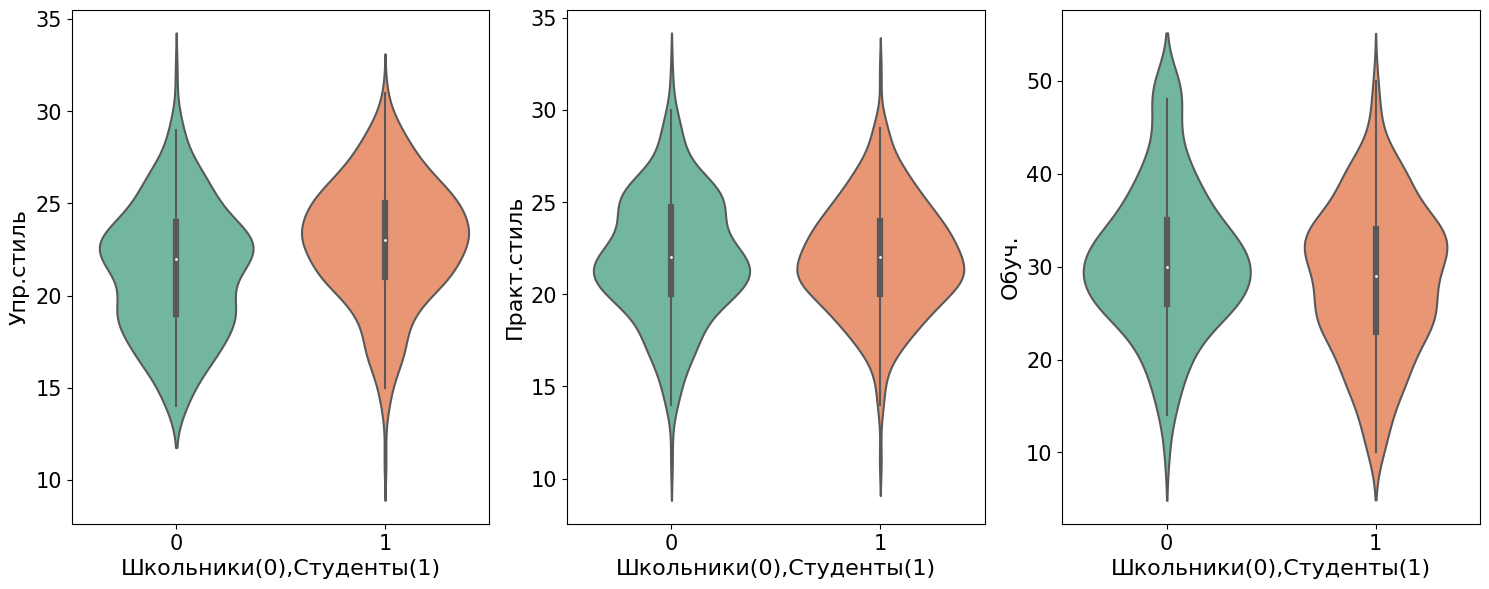

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))


# Second Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты/школьники'], y=data['Упр.стиль'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Упр.стиль', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты/школьники'], y=data['Практ.стиль'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Практ.стиль", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# First Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты/школьники'], y=data['Обуч.'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Обуч.", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size





plt.tight_layout()
plt.show()





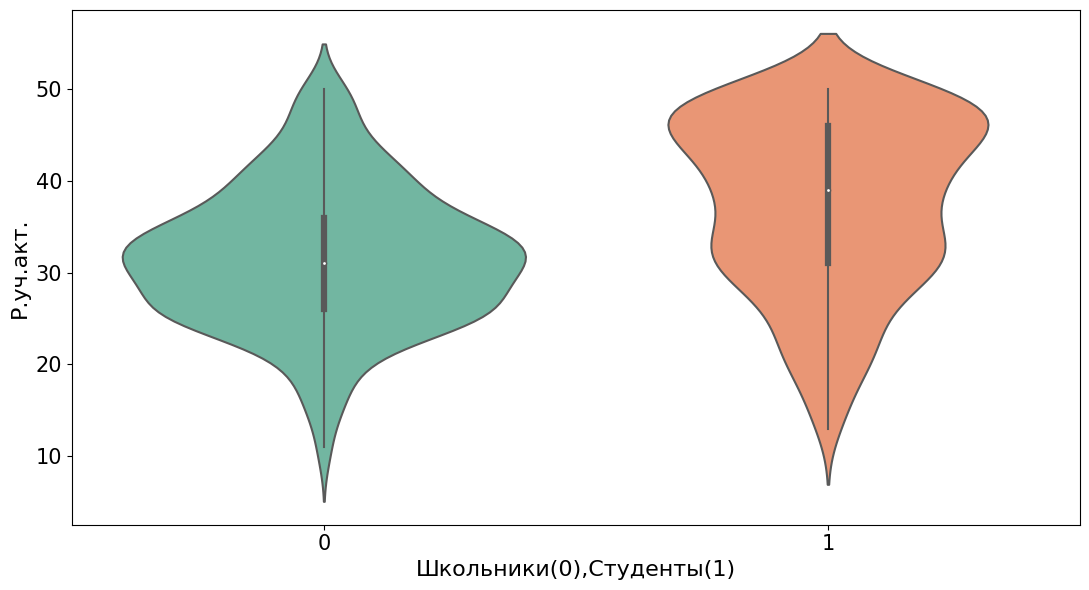

In [25]:
# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(11, 6))


# Second Plot
plt.subplot(1, 1, 1)
sns.violinplot(x=data['Студенты/школьники'], y=data['Р.уч.акт.'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Р.уч.акт.', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size



plt.tight_layout()
plt.show()

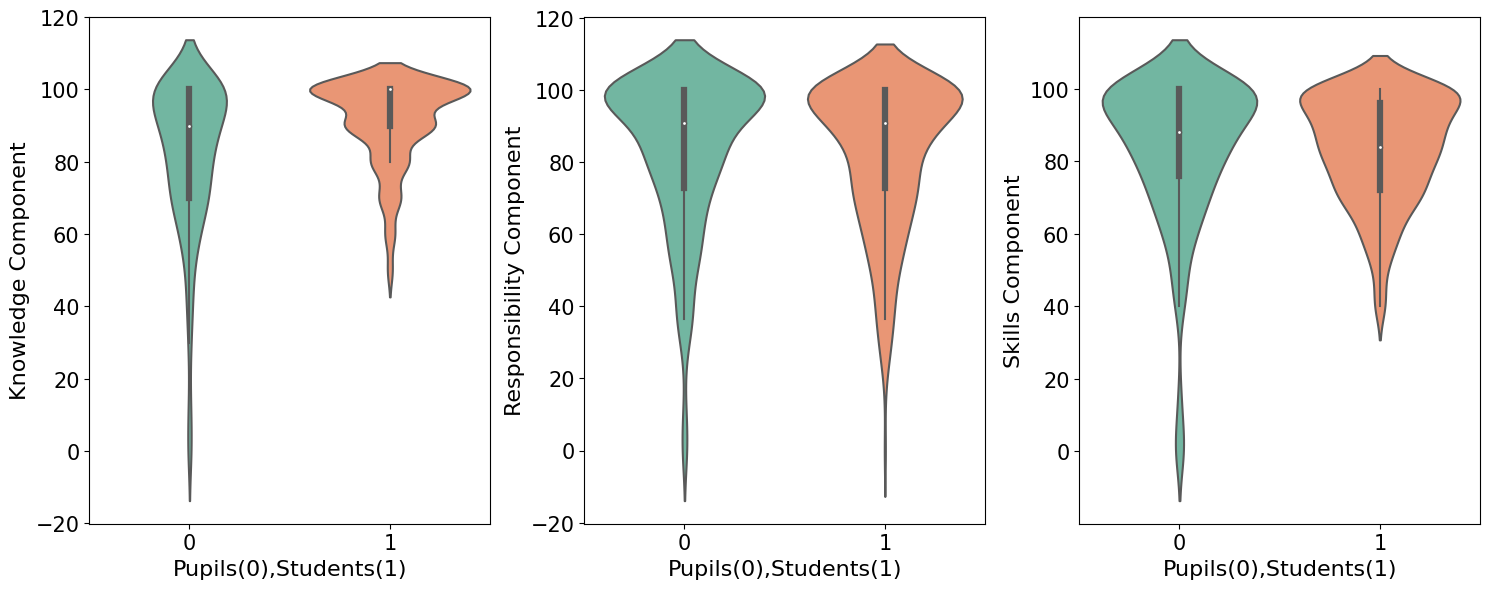

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент знаний'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Knowledge Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Responsibility Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент умений'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Skills Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


plt.tight_layout()
plt.show()


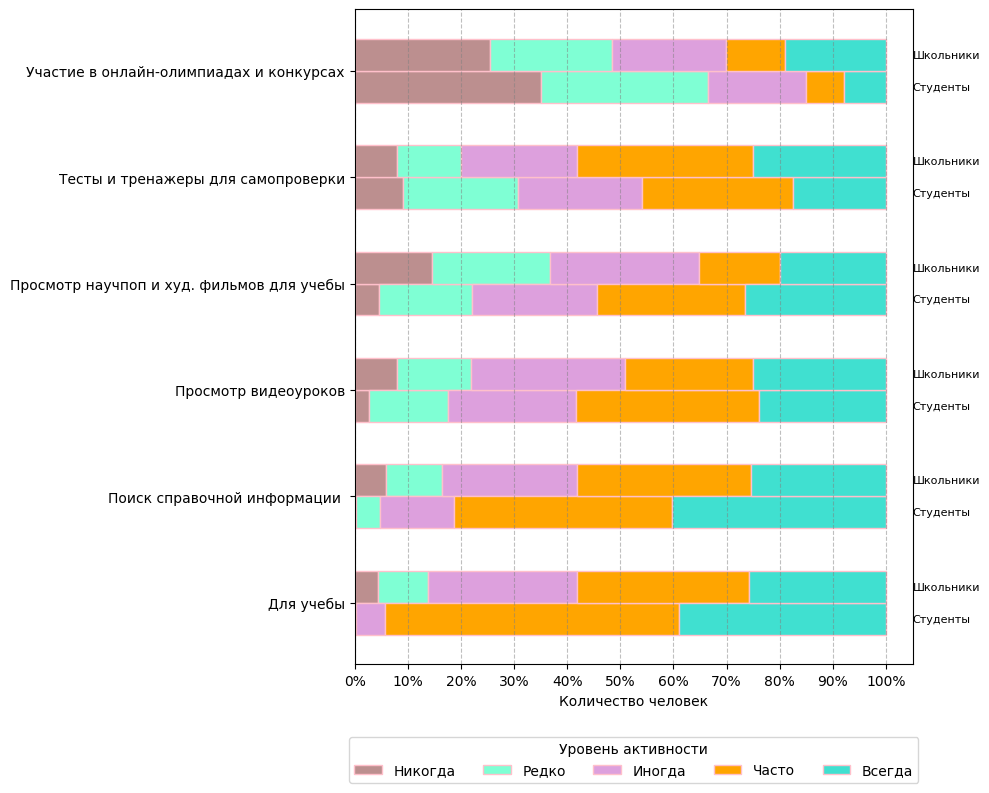

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activities = [
    'Для учебы',
    'Поиск справочной информации ',
    'Просмотр видеоуроков',
    'Просмотр научпоп и худ. фильмов для учебы',
    'Tесты и тренажеры для самопроверки',
    'Участие в онлайн-олимпиадах и конкурсах',

]

response_labels = ["Никогда", "Редко", "Иногда", "Часто", "Всегда"]
response_colors = ["rosybrown", "aquamarine", "plum", "orange", "turquoise"]

responses_students = np.array([
    [0.00,0.30,5.44, 55.29, 38.97],
    [0.3,4.53,13.9,41.09,40.18],
    [2.72,14.8,24.17,34.44,23.87],
    [4.53,17.52,23.56,27.79,26.59],
    [9.06,21.75,23.26,28.4,17.52],
    [35.05,31.42,18.43,7.25,7.85],
])

responses_schoolchildren = np.array([
    [4.36, 9.45, 28.00, 32.36, 25.82],
    [5.82, 10.55, 25.45, 32.73, 25.45],
    [8.0, 13.82, 29.09, 24.0, 25.09],
    [14.55,22.18,28.0,15.27,20.0],
    [8.0,12.0,21.82,33.09,25.09],
    [25.45,22.91,21.45,11.27,18.91],
])

y = np.arange(len(activities))  # the label locations
height = 0.30 # adjust the height to reduce the space between activity labels
border_color = "pink"  # color for the border of each bar

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here (e.g., figsize=(8, 10))

for i, color in enumerate(response_colors):
    left1 = np.sum(responses_students[:, :i], axis=1)
    left2 = np.sum(responses_schoolchildren[:, :i], axis=1)

    rects1 = ax.barh(y - height/2, responses_students[:, i], height, left=left1, label=response_labels[i], color=color, edgecolor=border_color)
    rects2 = ax.barh(y + height/2, responses_schoolchildren[:, i], height, left=left2, color=color, edgecolor=border_color)

ax.set_xlabel('Количество человек')
ax.set_title('Распределение ответов по группам и активностям')
ax.set_yticks(y)
ax.set_yticklabels(activities)
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

for percent in np.linspace(0, 100, 11):
    ax.axvline(x=percent, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


#ax.set_xticks(np.arange(0, 101, 20))
#ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
#ax.legend(title="Уровень активности")
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)

# Add labels on the side near bars
for j in range(len(activities)):
    ax.text(105, y[j] - height/2, "Студенты", ha='left', va='center', color='black', fontsize=8)
    ax.text(105, y[j] + height/2, "Школьники", ha='left', va='center', color='black', fontsize=8)

# Adjust the bbox_to_anchor parameter to bring the legend title closer
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=5)


fig.tight_layout()

plt.show()


In [56]:
# Define the binary variable
binary_variable = 'Студенты/школьники'

# Define the Likert scale variables you want to analyze
likert_scale_variables = [
    #'3. Для учебы',
       #'3. Поиск справочной информации (словари, справочники и т.д.)',
       #'4. Просмотр видеоуроков',
       '4. Для поиска информации, не связанной с учебой',
       '2. Для общения',
       #'5. Для покупок',
]

# Create a DataFrame to store the results
results = pd.DataFrame()

# Iterate through the Likert scale variables and calculate percentages based on the binary variable
for variable in likert_scale_variables:
    # Group the data by the binary variable and calculate the value counts for each group
    grouped_data = data.groupby([binary_variable, variable]).size().unstack(fill_value=0)

    # Calculate the percentages for each group
    percentages = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(2)

    # Rename the columns for clarity
    percentages.columns = [f'{variable} ({i})' for i in percentages.columns]

    # Store the percentages in the results DataFrame
    results = pd.concat([results, percentages], axis=1)

# Display the results DataFrame as a table
results


,"4. Для поиска информации, не связанной с учебой (1)","4. Для поиска информации, не связанной с учебой (2)","4. Для поиска информации, не связанной с учебой (3)","4. Для поиска информации, не связанной с учебой (4)","4. Для поиска информации, не связанной с учебой (5)",2. Для общения (1),2. Для общения (2),2. Для общения (3),2. Для общения (4),2. Для общения (5)
Студенты/школьники,,,,,,,,,,
0,2.52,4.32,19.42,33.81,39.93,2.52,7.55,16.55,34.53,38.85
1,0.00,1.97,6.89,45.57,45.57,0.00,2.62,8.20,50.16,39.02


In [52]:
import pandas as pd

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Filter data for students
students_data = data[data['Студенты/школьники'] == 1]

# Selecting relevant variables
selected_variables = [
    'Крит.стиль', 'Упр.стиль', 'Практ.стиль',
    'Обуч.', 'Р.уч.акт.',
    'Техносфера', 'Коммуникация', 'Потребление',
    '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Summary statistics for numerical variables
students_numerical_summary = students_data[selected_variables].describe()

# Frequency distribution for categorical variables
students_categorical_counts = students_data['2. Для общения'].value_counts()  # Replace with the actual categorical variable you want to analyze

# Correlation matrix for numerical variables
students_correlation_matrix = students_data[selected_variables].corr()

# Display the results
print("Summary Statistics for Numerical Variables:")
print(students_numerical_summary)

print("\nFrequency Distribution for Categorical Variables:")
print(students_categorical_counts)

print("\nCorrelation Matrix for Numerical Variables:")
print(students_correlation_matrix)


Summary Statistics for Numerical Variables:
       Крит.стиль   Упр.стиль  Практ.стиль       Обуч.   Р.уч.акт.  \
count  305.000000  305.000000   305.000000  305.000000  305.000000   
mean    21.973770   22.937705    21.963934   28.665574   37.508197   
std      2.947897    3.309584     3.015641    8.016408    9.522865   
min     11.000000   11.000000    11.000000   10.000000   13.000000   
25%     20.000000   21.000000    20.000000   23.000000   31.000000   
50%     22.000000   23.000000    22.000000   29.000000   39.000000   
75%     24.000000   25.000000    24.000000   34.000000   46.000000   
max     29.000000   31.000000    32.000000   50.000000   50.000000   

       Техносфера  Коммуникация  Потребление  2. Для общения  3. Для учебы  \
count  305.000000    305.000000   305.000000      305.000000    305.000000   
mean    75.118262     90.482230    85.245082        4.255738      4.324590   
std     20.066319     15.655356    16.236598        0.716471      0.576016   
min     11.11

In [53]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Split data into students and non-students
students_data = data[data['Студенты/школьники'] == 1]
non_students_data = data[data['Студенты/школьники'] == 0]

# Variables of interest
variables_of_interest = [
    'Крит.стиль', 'Упр.стиль', 'Практ.стиль',
    'Обуч.', 'Р.уч.акт.',
    'Техносфера', 'Коммуникация', 'Потребление',
    '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Perform t-tests
for variable in variables_of_interest:
    t_stat, p_value = ttest_ind(students_data[variable], non_students_data[variable], equal_var=False)
    print(f"T-test for {variable}: t-statistic = {t_stat}, p-value = {p_value}")


T-test for Крит.стиль: t-statistic = 1.445349926061392, p-value = 0.1489066804082763
T-test for Упр.стиль: t-statistic = 5.772494319682931, p-value = 1.2832315898326278e-08
T-test for Практ.стиль: t-statistic = -0.0003552544945798616, p-value = 0.9997166748087389
T-test for Обуч.: t-statistic = -3.2886725905393095, p-value = 0.0010679033329678003
T-test for Р.уч.акт.: t-statistic = 8.2236157733417, p-value = 1.3375946848749912e-15
T-test for Техносфера: t-statistic = -2.76322987220998, p-value = 0.005905445232235088
T-test for Коммуникация: t-statistic = 4.951781529912601, p-value = 9.771586682293976e-07
T-test for Потребление: t-statistic = 2.6859626670352017, p-value = 0.0074560084444239725
T-test for 2. Для общения: t-statistic = 3.4680504453390064, p-value = 0.000570933095283256
T-test for 3. Для учебы: t-statistic = 9.107752449772864, p-value = 3.732972642998515e-18
T-test for 4. Для поиска информации, не связанной с учебой: t-statistic = 4.235386161126201, p-value = 2.72631736891

In [54]:


! pip install prettytable

In [55]:
import pandas as pd
from scipy.stats import ttest_ind
from prettytable import PrettyTable

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Split data into students and non-students
students_data = data[data['Студенты/школьники'] == 1]
non_students_data = data[data['Студенты/школьники'] == 0]

# Variables of interest
variables_of_interest = [
    'Крит.стиль', 'Упр.стиль', 'Практ.стиль',
    'Обуч.', 'Р.уч.акт.',
    'Техносфера', 'Коммуникация', 'Потребление',
    '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Variable", "T-statistic", "P-value"]

# Perform t-tests and populate the table
for variable in variables_of_interest:
    t_stat, p_value = ttest_ind(students_data[variable], non_students_data[variable], equal_var=False)
    table.add_row([variable, round(t_stat, 3), round(p_value, 3)])

# Print the table
print(table)


+-------------------------------------------------+-------------+---------+
|                     Variable                    | T-statistic | P-value |
+-------------------------------------------------+-------------+---------+
|                    Крит.стиль                   |    1.445    |  0.149  |
|                    Упр.стиль                    |    5.772    |   0.0   |
|                   Практ.стиль                   |     -0.0    |   1.0   |
|                      Обуч.                      |    -3.289   |  0.001  |
|                    Р.уч.акт.                    |    8.224    |   0.0   |
|                    Техносфера                   |    -2.763   |  0.006  |
|                   Коммуникация                  |    4.952    |   0.0   |
|                   Потребление                   |    2.686    |  0.007  |
|                  2. Для общения                 |    3.468    |  0.001  |
|                   3. Для учебы                  |    9.108    |   0.0   |
| 4. Для пои